In [44]:
import pandas as pd

In [45]:
# Load the CSV file
df = pd.read_csv('cleaned_steam_data.csv')

In [46]:
# Select relevant columns and create a copy
df_cleaned = df[['AppID', 'Name', 'Positive_ratings', 'Negative_ratings', 'Price']].copy()

In [47]:
# Compute the rating difference
df_cleaned['Rating_difference'] = df_cleaned['Positive_ratings'] - df_cleaned['Negative_ratings']

In [48]:
# Filter out games priced over $100
df_cleaned = df_cleaned[df_cleaned['Price'] <= 100]

In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23236 entries, 0 to 23238
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AppID              23236 non-null  int64  
 1   Name               23236 non-null  object 
 2   Positive_ratings   23236 non-null  int64  
 3   Negative_ratings   23236 non-null  int64  
 4   Price              23236 non-null  float64
 5   Rating_difference  23236 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ MB


In [50]:
df_cleaned.head()

,AppID,Name,Positive_ratings,Negative_ratings,Price,Rating_difference
0,263380,Driftmoon,223,28,14.99,195
1,263340,Continue?9876543210,97,78,9.99,19
2,262550,Gunman Clive,656,86,1.99,570
3,264320,Captain Morgane and the Golden Turtle,102,66,4.99,36
4,263680,Unearthed: Trail of Ibn Battuta - Episode 1 - ...,429,380,4.99,49


In [51]:
# Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [52]:
print("CSV file cleaned and saved as 'cleaned_data.csv'.")

CSV file cleaned and saved as 'cleaned_data.csv'.


In [53]:
from pymongo import MongoClient
import pandas as pd

In [54]:
# Load the cleaned CSV file
df_cleaned = pd.read_csv('cleaned_data.csv')

In [55]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['app_data']
collection = db['apps']

In [56]:
# Convert DataFrame to dictionary and insert into MongoDB
data_dict = df_cleaned.to_dict(orient='records')
collection.insert_many(data_dict)

InsertManyResult([ObjectId('66dc0e67cca0217fe9e550c6'), ObjectId('66dc0e67cca0217fe9e550c7'), ObjectId('66dc0e67cca0217fe9e550c8'), ObjectId('66dc0e67cca0217fe9e550c9'), ObjectId('66dc0e67cca0217fe9e550ca'), ObjectId('66dc0e67cca0217fe9e550cb'), ObjectId('66dc0e67cca0217fe9e550cc'), ObjectId('66dc0e67cca0217fe9e550cd'), ObjectId('66dc0e67cca0217fe9e550ce'), ObjectId('66dc0e67cca0217fe9e550cf'), ObjectId('66dc0e67cca0217fe9e550d0'), ObjectId('66dc0e67cca0217fe9e550d1'), ObjectId('66dc0e67cca0217fe9e550d2'), ObjectId('66dc0e67cca0217fe9e550d3'), ObjectId('66dc0e67cca0217fe9e550d4'), ObjectId('66dc0e67cca0217fe9e550d5'), ObjectId('66dc0e67cca0217fe9e550d6'), ObjectId('66dc0e67cca0217fe9e550d7'), ObjectId('66dc0e67cca0217fe9e550d8'), ObjectId('66dc0e67cca0217fe9e550d9'), ObjectId('66dc0e67cca0217fe9e550da'), ObjectId('66dc0e67cca0217fe9e550db'), ObjectId('66dc0e67cca0217fe9e550dc'), ObjectId('66dc0e67cca0217fe9e550dd'), ObjectId('66dc0e67cca0217fe9e550de'), ObjectId('66dc0e67cca0217fe9e550

In [57]:
print("Data inserted into MongoDB.")

Data inserted into MongoDB.


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
# Load cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

In [60]:
# Define plot creation function
def create_plot(x_col, y_col, title, filename):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x_col, y=y_col, data=df_cleaned)
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel(y_col)
    plt.savefig(filename)
    plt.show()
    plt.close()

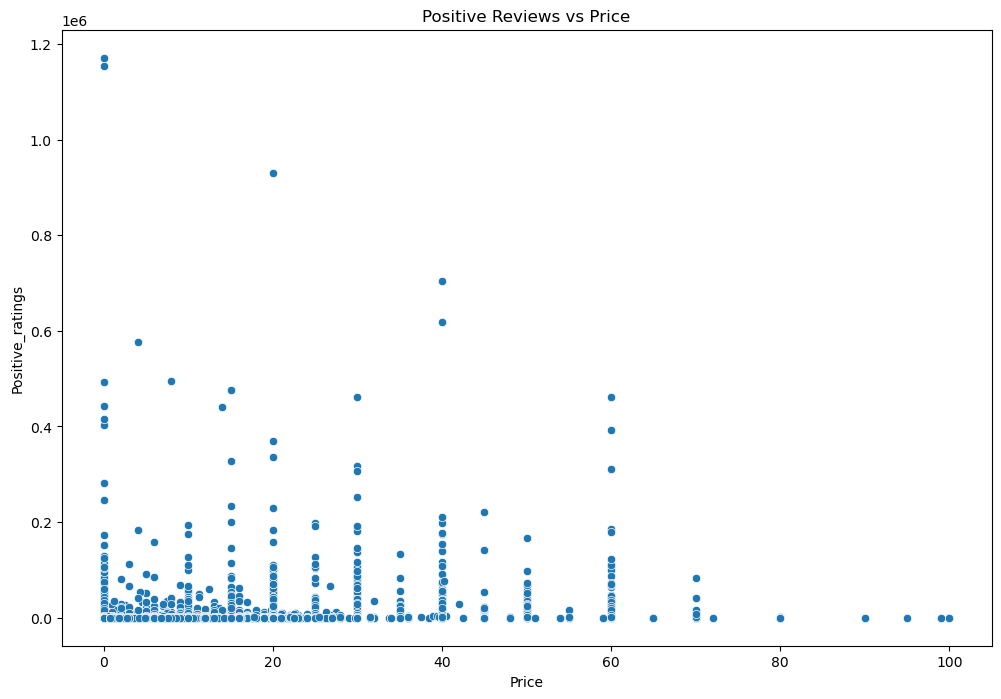

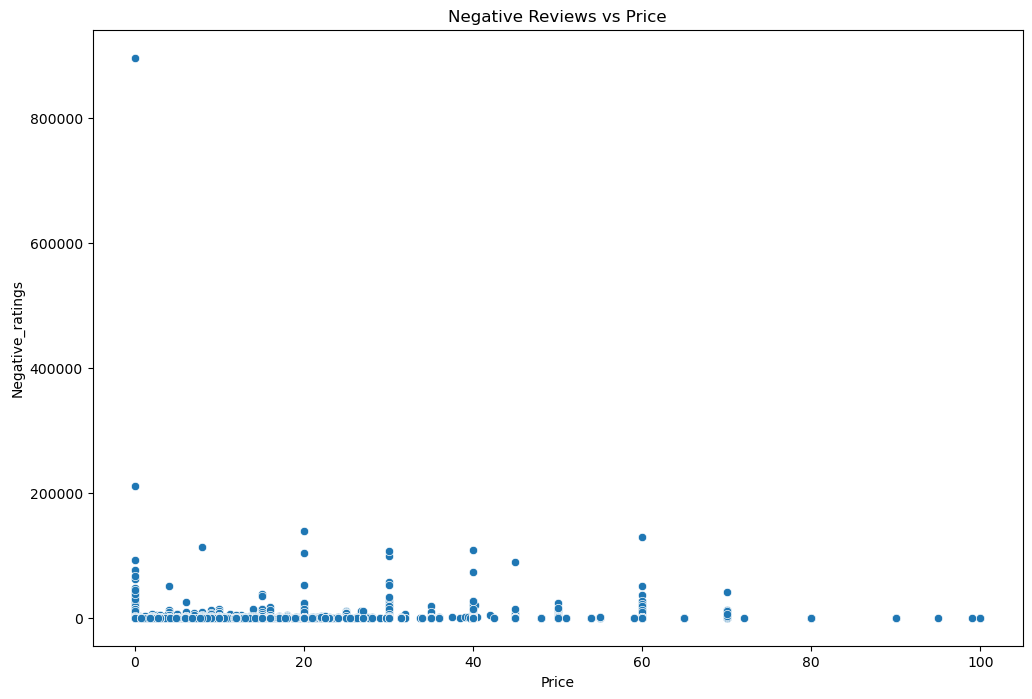

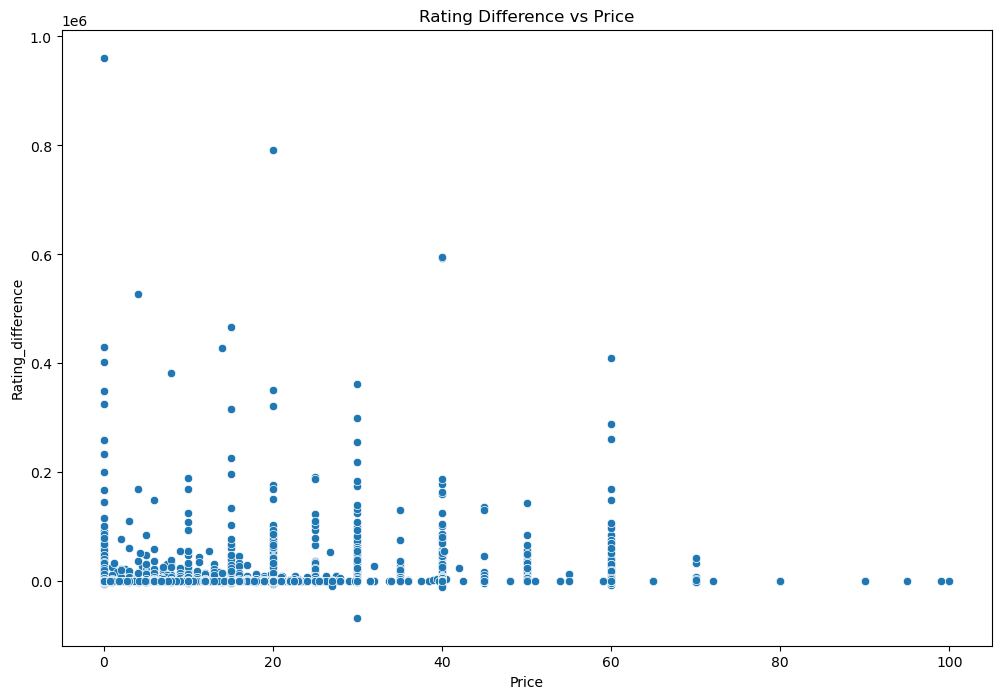

In [61]:
# Create and save plots
create_plot('Price', 'Positive_ratings', 'Positive Reviews vs Price', 'positive_vs_price.png')
create_plot('Price', 'Negative_ratings', 'Negative Reviews vs Price', 'negative_vs_price.png')
create_plot('Price', 'Rating_difference', 'Rating Difference vs Price', 'rating_difference_vs_price.png')

In [62]:
print("Plots created and saved as PNG files.")

Plots created and saved as PNG files.
